In [19]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [20]:
pbd = pd.read_csv('../input/phone_brand_device_model.csv', dtype={'device_id': np.str})

In [21]:
pbd.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [22]:
sum(pbd.duplicated('device_id'))

529

In [23]:
pbd = pbd.drop_duplicates('device_id', keep='first')
sum(pbd.duplicated('device_id'))

0

In [24]:
pbd['phone_type'] = pbd[['phone_brand','device_model']].apply(lambda x: ''.join(x), axis=1)
pbd = pbd[['device_id','phone_type']]
pbd.head()

,device_id,phone_type
0,-8890648629457979026,小米红米
1,1277779817574759137,小米MI 2
2,5137427614288105724,三星Galaxy S4
3,3669464369358936369,SUGAR时尚手机
4,-5019277647504317457,三星Galaxy Note 2


In [25]:
x = collections.Counter(pbd['phone_type'])
phone_type_count = pd.DataFrame(list(x.items()))
phone_type_count.columns = ['phone_type', 'Count']
phone_type_count = phone_type_count.sort_values(by='Count', ascending=False)
phone_type_count.head(20)

,phone_type,Count
380,小米红米note,7343
750,小米MI 3,5699
202,小米MI 2S,5301
389,三星Galaxy Note 3,5010
171,小米MI 4,4788
1214,三星Galaxy S4,4045
139,三星Galaxy Note 2,3985
591,华为荣耀6,3070
967,华为荣耀畅玩4X,2750
1191,华为荣耀3C,2596


<IPython.core.display.Javascript object>


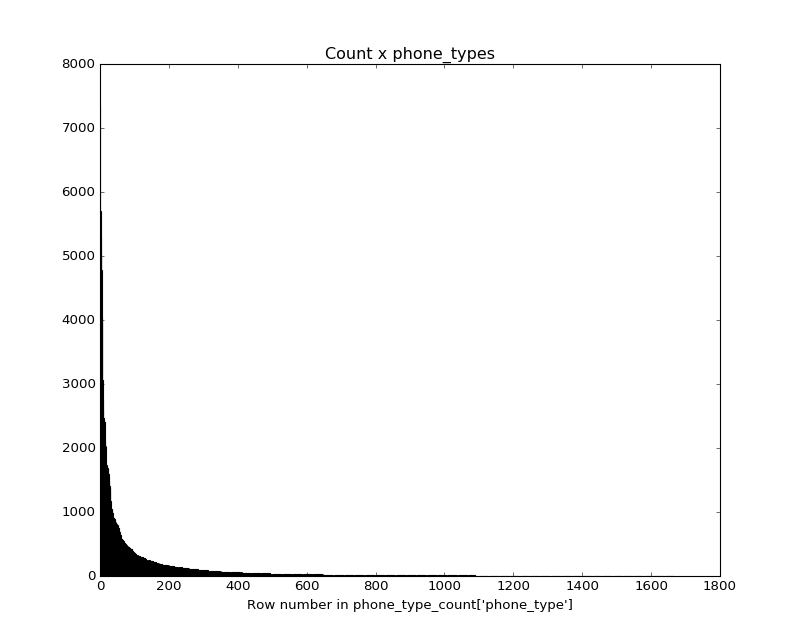

In [26]:
l = range(len(phone_type_count))
plt.figure(figsize=(10,8))
plt.bar(l, phone_type_count.ix[:,1])
plt.xlabel("Row number in phone_type_count['phone_type']")
plt.title('Count x phone_types')

# Merging with events.csv and checking for NA's

In [27]:
pbd = pd.read_csv('../input/phone_brand_device_model.csv')
pbd = pbd.drop_duplicates('device_id', keep='first')
events = pd.read_csv('../input/events.csv')
events_pbd = pd.merge(events, pbd, on='device_id', how='left')

In [28]:
list(events_pbd.columns)

['event_id',
 'device_id',
 'timestamp',
 'longitude',
 'latitude',
 'phone_brand',
 'device_model']

## Check NA's

In [29]:
sum(events_pbd['phone_brand'].isnull())

92533

In [30]:
sum(events_pbd['device_model'].isnull())

92533

So 92533 device id's are left with phone_brand and device_model uknown. Let's see what that means for the total events in the dataset.

In [31]:
92533 / len(events_pbd)

0.028445872208303233

From the total of event_ids, only 2.82% do not have a phone brand or model after the merge. It's not much we can choose to ignore it or try to impute based on other features.